In [1]:
import pandas as pd

df = pd.read_csv("nlp_dataset.csv", encoding='utf-8')
df.head()

c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Reviewer,Review,is_text,is_image,is_url,is_reply,mentions,hashtags,working_tweet,alt_text
0,02-1,30/03/23 10:03:24,https://twitter.com/lyn77togado/status/6925083...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@lyn77togado,lyn togado,...,NaN,NaN,True,True,False,False,NaN,NaN,statement last will testament frm former pres ...,image quote say 1/4 marcos wealth filipinos
1,02-2,30/03/23 10:20:55,https://twitter.com/gprsphilippines/status/706...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@gprsphilippines,GlobalPinoy,...,NaN,NaN,True,False,True,False,NaN,NaN,last will testament marcos clear deposit will ...,NaN
2,02-3,02/04/23 10:06:23,https://twitter.com/Carlojcb2010/status/807799...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@Carlojcb2010,Carlos Jr. Bantulan,...,NaN,NaN,True,False,True,False,NaN,NaN,last will testament pfemarcos people devine we...,abs cbn article marcos sr prefer burial place ...
3,02-4,02/04/23 10:42:22,https://twitter.com/Yrrahralph/status/74818105...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@Yrrahralph,harry padayao,...,NaN,NaN,True,False,True,False,NaN,NaN,richest last will testament president ferdinan...,article fabricate last will testament marcos sr
4,02-5,02/04/23 10:41:18,https://twitter.com/UNGclelaw/status/747645154...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@UNGclelaw,Clelaw.com,...,NaN,NaN,True,False,True,False,['@Philippine'],NaN,philippines wealthiest nation earth last will ...,article fabricate last will testament marcos sr


In [2]:
df.columns

Index(['ID', 'Timestamp', 'Tweet URL', 'Group', 'Collector', 'Category',
       'Topic', 'Keywords', 'Account handle', 'Account name', 'Account bio',
       'Account type', 'Joined', 'Following', 'Followers', 'Location', 'Tweet',
       'Tweet Translated', 'Date posted', 'Screenshot', 'Content type',
       'Likes', 'Replies', 'Retweets', 'Quote Tweets', 'Views', 'Rating',
       'Reasoning', 'Remarks', 'Link Redirect', 'Reviewer', 'Review',
       'is_text', 'is_image', 'is_url', 'is_reply', 'mentions', 'hashtags',
       'working_tweet', 'alt_text'],
      dtype='object')

In [3]:
df[['join_month', 'join_year']] = df['Joined'].str.split("/").to_list()

In [4]:
df[['Account type', 'join_year', 'Following', 'Followers', ]]

,Account type,join_year,Following,Followers
0,Identified,15,25,11
1,Anonymous,12,1766,290
2,Identified,10,483,76
3,Identified,14,1,3
4,Anonymous,14,2775,970
...,...,...,...,...
97,Anonymous,21,332,51
98,Identified,10,336,397
99,Identified,22,11,2
100,Anonymous,15,481,245


In [5]:
from nltk.corpus import stopwords
global stops
stops = stopwords.words('english')
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
stops.pop(129)

'will'

In [7]:
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

LINK_MATCH = re.compile(r"https?:\S+")
lemmatizer = WordNetLemmatizer()

def remove_punctuation(token):
    import string
    puncs = ''.join(set(string.punctuation)-set('/{}'))
    return token.translate(str.maketrans(puncs, ' '*len(puncs)))

def remove_stop_words(tweet, stopwords=stops):
    lis = tweet.split()
    to_return = []

    for i in lis:
        if i.lower() not in stopwords:
            to_return.append(i)
    
    return " ".join(to_return)

def remove_links(tweet):
    return LINK_MATCH.sub('', tweet.replace('. co', '.co')).replace('  ', ' ').strip()

def preprocess(tweet):
    funcs = [remove_links, remove_punctuation, remove_stop_words] # lemmatizer.lemmatize
    for func in funcs:
        if type(tweet) is float:
            return tweet
        tweet = func(tweet)
    tweet = tweet.replace('&amp;', 'and')

    tweet = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in  tweet.split(' ')])
    return tweet.lower()

df['Tweet Translated'].iloc[78], df['Tweet Translated'].iloc[78:79].map(preprocess).iloc[0]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


("That's why grandpa lakay chose to distribute the property to the poor Filipinos rather than let it all go to the oligarchs. That's the last will of grandpa lakay and the great Marcos who will do that. Don't let the oligarchs take all the wealth of grandpa lakay. Where is the wealth of PCGG?",
 'grandpa lakay choose distribute property poor filipinos rather let go oligarchs last will grandpa lakay great marcos will let oligarchs take wealth grandpa lakay wealth pcgg')

In [8]:
lower_limit = 1
upper_limit = 2
no_words = 100000

In [9]:
df['working_tweet'] = df['working_tweet'].str.replace('/', ' ')

In [10]:
df['working_tweet']

0      statement last will testament frm former pres ...
1      last will testament marcos clear deposit will ...
2      last will testament pfemarcos people devine we...
3      richest last will testament president ferdinan...
4      philippines wealthiest nation earth last will ...
                             ...                        
97     check philippines farmers debt will waive amp ...
98     maybe dream post bbm will win debts arise fath...
99     girl philippines debt marcos leave marcos die ...
100    fem marcos last will wants share divine wealth...
101    freeze golds king solomon gold marcos want bre...
Name: working_tweet, Length: 102, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

counter = CountVectorizer(max_features = no_words, ngram_range=(lower_limit, upper_limit))
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(), max_features = no_words, ngram_range=(lower_limit, upper_limit),
                        max_df=0.75, use_idf=True, norm=None, token_pattern=None)

In [12]:
tfs = tfidf.fit_transform(df['working_tweet'])

In [13]:
counts = counter.fit_transform(df['working_tweet'])
counts

<102x1850 sparse matrix of type '<class 'numpy.int64'>'
	with 3424 stored elements in Compressed Sparse Row format>

In [14]:
id2word = dict(zip(range(len(counter.get_feature_names_out())), counter.get_feature_names_out()))

In [15]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

li = []

for n_topics in range(1,11):
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10, 
                                                learning_method='online', learning_offset=50, n_jobs=1, random_state=42)

    W = lda.fit_transform(tfs)
    H = lda.components_

    # Show top 15 relevant words for each of the 25 topics
    num_words = 15
    vocab = np.array(tfidf.get_feature_names_out())
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
    topic_words = ([top_words(t) for t in H])
    topics = [', '.join(t) for t in topic_words]
    df_topics = pd.DataFrame(topics, columns=['Keywords'])
    df_topics['Topic ID'] = range(1, len(topics) + 1)
    li.append((n_topics, lda.bound_))

In [16]:
li = list(zip(*li))

Text(0.5, 1.0, 'LDA Bound - Number of Clusters')

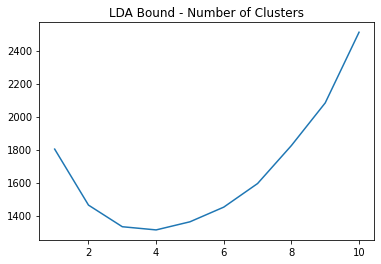

In [17]:
import matplotlib.pyplot as plt
plt.plot(li[0], li[1])
plt.title('LDA Bound - Number of Clusters')

In [18]:
n_topics = 4

lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10, learning_method='online',
                                learning_offset=50, n_jobs=1, random_state=42)

W = lda.fit_transform(tfs)
H = lda.components_

# Show top 15 relevant words for each of the 25 topics
num_words = 15
vocab = np.array(tfidf.get_feature_names_out())
top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H])
topics = [', '.join(t) for t in topic_words]
df_topics = pd.DataFrame(topics, columns=['Keywords'])
df_topics['Topic ID'] = range(1, len(topics) + 1)

In [19]:
topicid = ["Topic" + str(i+1) for i in range(lda.n_components)]
tweetid = ["Tweet" + str(i+1) for i in range(len(df.working_tweet))]

df_topics_lda = pd.DataFrame(np.round(W,2), columns=topicid, index=tweetid)
significanttopic = np.argmax(df_topics_lda.values, axis=1)+1

df_topics_lda['dominant_topic'] = significanttopic
df_topics_lda['breakdown'] = df_topics_lda.apply(lambda row: '\n'.join([f'{col}: {row[col]}' 
                                                        for col in sorted(df_topics_lda.columns, key=lambda x: row[x], reverse=True) 
                                                        if row[col] > 0 and col != 'dominant_topic']), axis=1)
df_topics_lda.head(10)

,Topic1,Topic2,Topic3,Topic4,dominant_topic,breakdown
Tweet1,0.00,0.00,0.99,0.00,3,Topic3: 0.99
Tweet2,0.00,0.00,0.00,0.99,4,Topic4: 0.99
Tweet3,0.99,0.00,0.00,0.00,1,Topic1: 0.99
Tweet4,0.01,0.01,0.97,0.01,3,Topic3: 0.97\nTopic1: 0.01\nTopic2: 0.01\nTopi...
Tweet5,0.00,0.00,0.00,0.99,4,Topic4: 0.99
Tweet6,0.00,0.00,0.00,0.99,4,Topic4: 0.99
Tweet7,0.01,0.01,0.98,0.01,3,Topic3: 0.98\nTopic1: 0.01\nTopic2: 0.01\nTopi...
Tweet8,0.00,0.00,0.00,0.99,4,Topic4: 0.99
Tweet9,0.01,0.01,0.01,0.98,4,Topic4: 0.98\nTopic1: 0.01\nTopic2: 0.01\nTopi...
Tweet10,0.00,0.00,1.00,0.00,3,Topic3: 1.0


In [20]:
# Visualize topics
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_topics_lda.iloc[:,:n_topics])

# Apply K-means clustering
n_topics = 4
kmeans = KMeans(n_clusters=n_topics, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_topics_lda.iloc[:,:n_topics])

c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [21]:
# Create a new dataframe with t-SNE coordinates and cluster labels
import textwrap

def split_text(text, max_length):
  lines = textwrap.wrap(text, width=max_length, break_long_words=False)
  return "<br>".join(lines)

df_topics_cluster = pd.DataFrame({'X': tsne_result[:, 0],
                                  'Y': tsne_result[:, 1],
                                  'Tweet': df['Tweet'],
                                  'Cluster': df_topics_lda.reset_index()['dominant_topic'].astype(str), # topics via LDA
                                  # 'Cluster': cluster_labels},                                         # clusters via K-means
                                  'Breakdown': df_topics_lda.reset_index()['breakdown']})

df_topics_cluster['Tweet'] = df_topics_cluster['Tweet'].apply(lambda x: split_text(x, 40))
df_topics_cluster['Breakdown'] = df_topics_cluster['Breakdown'].str.replace('\n','<br>')

df_topics_cluster.head(10)

,X,Y,Tweet,Cluster,Breakdown
0,-4.398011,-1.172455,statement from the last will and<br>testament ...,3,Topic3: 0.99
1,-3.395815,7.409121,The Last Will and Testament of Marcos is<br>cl...,4,Topic4: 0.99
2,-9.062208,5.383867,Last will and testament of then<br>PFEMarcos f...,1,Topic1: 0.99
3,-4.216341,-1.008768,The Richest: Last Will &amp;Testament of<br>Pr...,3,Topic3: 0.97<br>Topic1: 0.01<br>Topic2: 0.01<b...
4,-3.388214,7.364520,Philippines: Wealthiest Nation on Earth-<br>Th...,4,Topic4: 0.99
5,-3.282510,7.136794,Philippines: Wealthiest Nation on Earth<br>– T...,4,Topic4: 0.99
6,-4.194694,-1.004288,Last Will Testament of Ferdinand Edralin<br>Ma...,3,Topic3: 0.98<br>Topic1: 0.01<br>Topic2: 0.01<b...
7,-3.403695,7.158817,The Last Will and Testament of Ferdinand<br>E....,4,Topic4: 0.99
8,-3.453345,7.218026,Wag daw po tayong mag-alala kasi may<br>last w...,4,Topic4: 0.98<br>Topic1: 0.01<br>Topic2: 0.01<b...
9,-3.962035,-1.663143,Madam Imelda once went to the senate<br>congre...,3,Topic3: 1.0


In [22]:
df_topics_cluster['join_year'] = df['join_year']
df_topics_cluster['post_year'] = df['Date posted'].astype('datetime64[ns]').dt.year

C:\Users\james\AppData\Local\Temp\ipykernel_31272\1710223759.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_topics_cluster['post_year'] = df['Date posted'].astype('datetime64[ns]').dt.year


In [23]:
df['Date posted'].astype('datetime64[ns]').dt.year

C:\Users\james\AppData\Local\Temp\ipykernel_31272\2959486784.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date posted'].astype('datetime64[ns]').dt.year


0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
97     2022
98     2022
99     2022
100    2022
101    2022
Name: Date posted, Length: 102, dtype: int32

In [24]:
# Plot tweets as colored points
df_topics_cluster.sort_values('Cluster', key=lambda x: pd.to_numeric(x, errors='coerce'), inplace=True)

fig = px.scatter(df_topics_cluster, x='X', y='Y', color='Cluster', 
                 title='Topic Clustering using LDA and t-SNE',
                 hover_name='Tweet',
                 hover_data={'X':False, 'Y':False, 'Cluster':False, 'Tweet':False, 'Breakdown':True, 'post_year': True})

for i, keyword in enumerate(df_topics['Keywords']):
  fig.add_annotation(
    x=0,
    y=-0.2*(i/5)-0.08,
    text="Topic %d: %s"%(i+1, keyword.replace(' ', '-').replace(',-', ', ')),
    showarrow=False,
    xref='paper',
    yref='paper',
    align='left',
    font=dict(color=fig.data[i].marker['color'])
  )

fig.update_layout(height=710,
                  xaxis_title='', yaxis_title='',
                  margin=dict(b=200),
                  paper_bgcolor='#2c3e50',
                  title=dict(font=dict(color='white')),
                  legend=dict(title="Topic", font=dict(color='white')))
fig.show()

In [25]:
# df_topics_cluster[['post_year', 'Cluster', 'Content type']].to_csv('year_cluster.csv')

In [26]:
df_topics_cluster['Content type'] = df['Content type']

In [27]:
import gensim
lda_model_tfidf = gensim.models.LdaModel(corpus=gensim.matutils.Sparse2Corpus(tfs), id2word=id2word, num_topics=4, random_state=41, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning:

urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!



In [28]:
id2word = gensim.corpora.Dictionary(df['working_tweet'].map(lambda x: x.split()).to_list())

In [29]:
from pprint import pprint
pprint(lda_model_tfidf.print_topics())

[(0,
  '0.222*"according ferdinand" + 0.061*"accept" + 0.059*"another" + '
  '0.053*"accrue" + 0.051*"accord last" + 0.046*"aint like" + 0.044*"50 years" '
  '+ 0.043*"also help" + 0.042*"already mature" + 0.039*"amp"'),
 (1,
  '0.097*"amp marcos" + 0.074*"accord" + 0.059*"add" + 0.059*"anti marcos" + '
  '0.051*"according marcos" + 0.051*"amazing" + 0.051*"6m homeless" + '
  '0.050*"6m" + 0.046*"2020 say" + 0.045*"ahhh"'),
 (2,
  '0.127*"actually late" + 0.092*"987" + 0.078*"ahhh hope" + 0.073*"alt text" '
  '+ 0.059*"accrue filipino" + 0.043*"90s" + 0.041*"50" + 0.041*"also fulfil" '
  '+ 0.038*"amp good" + 0.034*"90s imelda"'),
 (3,
  '0.060*"1998 imelda" + 0.057*"amp new" + 0.051*"according" + 0.045*"allege '
  'personal" + 0.039*"amount many" + 0.038*"another bank" + 0.037*"amount" + '
  '0.036*"34" + 0.033*"agree even" + 0.031*"accept marcos"')]


In [30]:
corpus = gensim.matutils.Sparse2Corpus(tfs)

In [31]:
df['working_tweet'].map(lambda x: x.split()).to_list()

[['statement',
  'last',
  'will',
  'testament',
  'frm',
  'former',
  'pres',
  'e',
  'marcos',
  'heart',
  'entire',
  'people',
  'phil'],
 ['last',
  'will',
  'testament',
  'marcos',
  'clear',
  'deposit',
  'will',
  'accrue',
  'filipino',
  'people'],
 ['last',
  'will',
  'testament',
  'pfemarcos',
  'people',
  'devine',
  'wealth',
  'marcos',
  'tallano',
  'clan'],
 ['richest', 'last', 'will', 'testament', 'president', 'ferdinand', 'marcos'],
 ['philippines',
  'wealthiest',
  'nation',
  'earth',
  'last',
  'will',
  'amp',
  'testament',
  'pres',
  'ferdinand',
  'marcos',
  'via',
  'news',
  'feed'],
 ['philippines',
  'wealthiest',
  'nation',
  'earth',
  '–',
  'last',
  'will',
  'testament',
  'president',
  'ferdinand',
  'marcos',
  'via'],
 ['last',
  'will',
  'testament',
  'ferdinand',
  'edralin',
  'marcos',
  'people',
  'philippines✌️❤️🇵🇭'],
 ['last',
  'will',
  'testament',
  'ferdinand',
  'e',
  'marcos',
  'reason',
  'longest',
  'time',
 

In [32]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus))  
# a measure of how good the model is. lower the better
# .
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model_tfidf, texts=df['working_tweet'].map(lambda x: x.split()).to_list(), dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.260977522851804

Coherence Score:  0.6310069598751221


In [33]:
perp_coh = [] # 1 -> 10
for i in range(1,20):
    lda_model_tfidf = gensim.models.LdaModel(corpus=gensim.matutils.Sparse2Corpus(tfs), id2word=id2word, num_topics=i, random_state=41, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model_tfidf, texts=df['working_tweet'].map(lambda x: x.split()).to_list(), dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(i)
    perp_coh.append((lda_model_tfidf.log_perplexity(corpus), coherence_lda)) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [34]:
fig = px.line([x[0] for x in perp_coh], title='Perplexity over N-Topics')
fig.update_layout(xaxis_title="No. of Topics", yaxis_title="Perplexity Metric")
fig.show()

In [35]:
import plotly.graph_objects as go

fig = px.line([x[1] for x in perp_coh], title='Coherence over N-Topics')
fig.update_layout(xaxis_title="No. of Topics", yaxis_title="Coherence Metric", showlegend=False)
fig.add_trace(go.Scatter(x=[7], y=[0.6222036], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 10))
fig.show()

In [36]:
lda_model_tfidf_best = gensim.models.LdaModel(corpus=gensim.matutils.Sparse2Corpus(tfs), id2word=id2word, num_topics=7, random_state=41, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [37]:
pprint(lda_model_tfidf_best.print_topics())

[(0,
  '0.137*"worry" + 0.133*"news" + 0.115*"congress" + 0.100*"wealthiest" + '
  '0.097*"countries" + 0.096*"fem" + 0.089*"government" + 0.067*"pres" + '
  '0.048*"phil" + 0.035*"research"'),
 (1,
  '0.111*"ask" + 0.109*"grandchild" + 0.089*"madam" + 0.087*"read" + '
  '0.086*"kept" + 0.081*"mainstream" + 0.075*"give" + 0.067*"bias" + '
  '0.065*"reason" + 0.063*"keep"'),
 (2,
  '0.160*"national" + 0.094*"7" + 0.090*"via" + 0.089*"comprehensively" + '
  '0.086*"true" + 0.078*"media" + 0.074*"edralin" + 0.067*"ferdinand" + '
  '0.045*"mang" + 0.037*"malakaniang"'),
 (3,
  '0.147*"edsa" + 0.111*"implement" + 0.108*"–" + 0.097*"imelda" + 0.096*"1" + '
  '0.096*"philippines✌️❤️🇵🇭" + 0.073*"suffer" + 0.067*"treasury" + '
  '0.051*"late" + 0.045*"devine"'),
 (4,
  '0.297*"foundation" + 0.223*"insist" + 0.136*"great" + 0.102*"humanitarian" '
  '+ 0.040*"last" + 0.038*"heart" + 0.024*"bong" + 0.023*"people" + '
  '0.020*"nation" + 0.014*"frm"'),
 (5,
  '0.103*"longest" + 0.086*"testament" + 

In [38]:
gensim.matutils.Sparse2Corpus(tfs)[0]

[(7, 4.025291075795535),
 (20, 4.025291075795535),
 (67, 4.025291075795535),
 (81, 4.025291075795535)]

In [39]:
topic_id_assign = pd.Series(map(lambda x: lda_model_tfidf_best.get_document_topics(gensim.matutils.Sparse2Corpus(tfs)[x]), range(tfs.shape[0])))
topic_id_assign

0      [(3, 0.2483041), (4, 0.49580854), (6, 0.248582...
1                                       [(4, 0.9686331)]
2                                       [(6, 0.9684543)]
3                                      [(4, 0.96863323)]
4                                       [(3, 0.9675465)]
                             ...                        
97                                     [(4, 0.96863323)]
98                                      [(5, 0.9729292)]
99                                      [(5, 0.9729292)]
100                                     [(5, 0.9729291)]
101                                     [(5, 0.9729291)]
Length: 102, dtype: object

In [40]:
tfs.shape[1]

1910

In [41]:
df['working_tweet'].iloc[0]

'statement last will testament frm former pres e marcos heart entire people phil'

In [42]:
df['topic_id_assign'] = topic_id_assign

In [43]:
df['topic_id_assign'] = topic_id_assign
df['topic_id_assign'].value_counts()

topic_id_assign
[(6, 0.96845436)]                                     11
[(3, 0.9675466)]                                      10
[(4, 0.96863323)]                                      8
[(1, 0.96955585)]                                      8
[(5, 0.97292924)]                                      7
[(2, 0.96862346)]                                      7
[(0, 0.96778256)]                                      6
[(3, 0.9675465)]                                       5
[(4, 0.9686331)]                                       4
[(6, 0.9684543)]                                       4
[(1, 0.9695558)]                                       4
[(5, 0.9729292)]                                       4
[(0, 0.96778244)]                                      2
[(0, 0.9677825)]                                       2
[(2, 0.9686233)]                                       2
[(5, 0.9729291)]                                       2
[(0, 0.9821583)]                                       2
[(3, 0.19909222

In [44]:
pd.set_option('display.max_colwidth', None)

In [45]:
df.loc[df['working_tweet'].str.find('bias')!=-1, ['topic_id_assign','working_tweet']]

,topic_id_assign,working_tweet
11,"[(0, 0.96778256)]",awaken truth great former president marcos last will testament please wake try research rely bias mainstream media 🤗


In [46]:
df.loc[df['topic_id_assign'].map(lambda x: 1 in [i[0] for i in x]), ['topic_id_assign','working_tweet']]

,topic_id_assign,working_tweet
42,"[(1, 0.96955585)]",ahhh hope last will testament marcos will fulfil elitists yellow people get
43,"[(1, 0.96955585)]",fulfillment president marcos last will testament people via
55,"[(1, 0.9695558)]",money give back 248 billion dollars interest different marcos money put world bank put last will testament give philippines 2020 say bank will give money philippines
56,"[(1, 0.9695558)]",late pres ferdinand e marcos last will testament need mailplemented government pres fem will give lot money free 🙏🙏🙏 rich much hope filipinos will unite time deposit fully mature
59,"[(1, 0.96955585)]",marcos foundation humanity really need elect bbm executive order president open bbm filipinos fem last will will fulfill late president people philippines
60,"[(1, 0.96955585)]",father last will testament will fulfil country noble imelda marcos give long time watch news
71,"[(1, 0.96955585)]",watch video mrs approve imelda marcos last will pres marcos sr cabinet state philippines will bequeath unimaginable wealth know yellowtards sign want put pocket
72,"[(1, 0.96955585)]",fem corrupt evil hope put marcos humanitarian foundation last will testament cory allow implement time
73,"[(1, 0.49313438), (5, 0.49499467)]",vote bong bong marcos president retrieve wealth philippines keep countries return back national treasury read last will testament late ferdinand marcos
75,"[(1, 0.96955585)]",filipino future 1998 imelda marcos go senate beg help implement last will testament president ferdinand e marcos complete marcos humanitarian foundation


In [47]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf_best, corpus, id2word)
pyLDAvis.save_html(vis, 'lda.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.437985 -0.006897       1        1  24.888103
1      0.075505  0.106494       2        1  15.782141
6      0.071611  0.078523       3        1  12.931619
2      0.078135  0.111950       4        1  12.424040
4      0.080870 -0.422737       5        1  11.485074
3      0.064878  0.062728       6        1  11.359377
0      0.066984  0.069939       7        1  11.129646, topic_info=          Term        Freq       Total Category  logprob  loglift
51  foundation  463.000000  463.000000  Default  30.0000  30.0000
56      insist  347.000000  347.000000  Default  29.0000  29.0000
49        fake  298.000000  298.000000  Default  28.0000  28.0000
82    national  269.000000  269.000000  Default  27.0000  27.0000
97        edsa  227.000000  227.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
87        vote    0.160386  177.416735   Topic7  -9.1483  -4.8131
69       media    0.160365  131.636883   Topic7  -9.1484  -4.5148
23   president    0.160360   51.204947   Topic7  -9.1485  -3.5706
75        wake    0.160329   66.344884   Topic7  -9.1487  -3.8298
85      return    0.160328  157.025099   Topic7  -9.1487  -4.6914

[348 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
36        6  0.991318           1
37        4  0.996687           7
13        5  0.924912      accrue
46        1  0.993829       agony
25        2  0.991350         amp
...     ...       ...         ...
32        7  0.994064  wealthiest
12        5  0.924912        will
45        7  0.996353       worry
33        6  0.992931           –
76        1  0.988461           🤗

[102 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 7, 3, 5, 4, 1])

In [48]:
df.loc[df['working_tweet'].str.find('vote')!=-1]

,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,is_image,is_url,is_reply,mentions,hashtags,working_tweet,alt_text,join_month,join_year,topic_id_assign
14,02-15,02/04/23 10:55:43,https://twitter.com/MorseCo11471683/status/1508272780818755584,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to his Last Will and Testament,marcos last will,@MorseCo11471683,Juan.com,...,False,True,False,NaN,NaN,vote bong bong marcos president retrieve wealth philippines keep countries return back national treasury read comprehensively last will amp testament late ferdinand marcos,NaN,05,21,"[(3, 0.9675465)]"
45,02-46,30/03/23 15:34:29,https://twitter.com/ArenosDom/status/1374742736910249988,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to his Last Will and Testament,marcos last will,@ArenosDom,Dom Arenos,...,False,False,False,NaN,NaN,filipinos let vote bongbong marcos become president will implement last will testament redeem wealth ferdinand marcos entrust bank world already mature time bongbong marcos will recover gold us,NaN,02,21,"[(2, 0.7939054), (5, 0.20044895)]"
46,02-47,30/03/23 12:10:03,https://twitter.com/ArenosDom/status/1382877661429518341,2,"Reynoso, Kyle",MRCS,Marcos Sr.'s Wealth for Filipinos According to his Last Will and Testament,marcos last will,@ArenosDom,Dom Arenos,...,False,False,False,NaN,NaN,vote bongnong marcos will save country poverty will open last will late ferfinand e marcos gold filipinos people believe phillippines will great listen aquinos rant marcoses,NaN,02,21,"[(3, 0.9675466)]"
73,02-74,31/03/23 19:01:05,https://twitter.com/MorseCo11471683/status/1509314770637582336,2,"De los Santos, Joshua Paolo",MRCS,Marcos Sr.'s Wealth for Filipinos According to his Last Will and Testament,marcos last will,@MorseCo11471683,Juan.com,...,False,True,False,NaN,NaN,vote bong bong marcos president retrieve wealth philippines keep countries return back national treasury read last will testament late ferdinand marcos,NaN,05,21,"[(1, 0.49313438), (5, 0.49499467)]"


In [49]:
topic_id_classif = list(map(lambda x: max(lda_model_tfidf_best.get_document_topics(x), key=lambda k: k[1])[0], gensim.matutils.Sparse2Corpus(tfs)))

In [50]:
df['best_topic_classif'] = topic_id_classif
df['best_topic_classif']

ValueError: Length of values (1910) does not match length of index (102)